## Что вас ждет на экзамене

- Работа со списками, словарями
- Файлы, JSON, CSV
- Регулярные выражения
- Pandas
<hr>

### Задача 1

Сохранить себе проект pykili (https://github.com/pykili/pykili.github.io), найти все файлы формата .md и сформировать словарь, где ключ - название папки, а значение - лист файлов с форматом .md 

hint: домашняя директория будет pykili.github.io, файл readme.md можно проигнорировать

In [ ]:
import os

#path = os.path.abspath('pykili.github.io-master')
folder = []
dct={}
for i in os.walk('pykili.github.io-master'):
    folder.append(i)
for address, dirs, files in folder:
    for file in files:
        if file.endswith('.md'):
            dct[address] = file
            #print(address + '/' + file)
print(dct)

In [ ]:
dct

In [ ]:
import os

md_dict = {}

for root, dirs, files in os.walk('pykili.github.io-master'):
    f_list = [fl for fl in files if os.path.splitext(fl)[1] == '.md']
    if f_list != []:
        md_dict[root] = f_list

In [ ]:
md_dict

In [2]:
!!pwd

['/Users/antonleonov/Desktop']

### Задача 2

Скачать файл https://drive.google.com/file/d/15FvspbVbu72Sa64am1mJ_3xueKiY0PVH/view?usp=sharing - рейтинг World Happiness Report 2021. Вам необходимо для каждой страны (Country name) создать отдельный файл, в котором будут находиться страны только этой страны и их данные

In [3]:
import pandas as pd

df = pd.read_csv('WHR2021.csv')
for country in df['Country name'].unique():
    df[df['Country name'] == country].to_csv(country + '.csv')

In [4]:
import csv

with open('WHR2021.csv') as file:
    dct = csv.DictReader(file)
    for line in dct:
        with open(line['Country name'] + '1.csv', 'a') as new:
            dctwrite = csv.DictWriter(new, fieldnames = line.keys())
            dctwrite.writerow(line)

### Задача 3

Работаем с тем-же файлом. Выведите топ 10 с самым низким средним восприятием коррупции (Perceptions of corruption). Для этих 10 стран найдите страну с самым большим показателем Healthy life expectancy at birth. Постройте по этой стране линейный график данной величины 

In [6]:
import pandas as pd

df = pd.read_csv('WHR2021.csv')


Country name
Afghanistan    0.843283
Albania        0.869360
Algeria        0.690871
Angola         0.867018
Argentina      0.841997
                 ...   
Venezuela      0.795206
Vietnam        0.784752
Yemen          0.824832
Zambia         0.828810
Zimbabwe       0.844158
Name: Perceptions of corruption, Length: 166, dtype: float64

In [15]:
df_non_corupt_countries = df.groupby('Country name')['Perceptions of corruption'].mean().reset_index().sort_values(by='Perceptions of corruption').head(10)

In [16]:
df_non_corupt_countries

,Country name,Perceptions of corruption
129,Singapore,0.097752
121,Qatar,0.183798
124,Rwanda,0.185955
39,Denmark,0.200404
47,Finland,0.248932
142,Sweden,0.262804
105,New Zealand,0.266145
156,United Arab Emirates,0.299117
143,Switzerland,0.305930
111,Norway,0.344084


<ipython-input-14-12f38c64fdab>:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  anti_corr = df.groupby('Country name', as_index=False)['Perceptions of corruption', 'Healthy life expectancy at birth'].agg('mean').sort_values('Perceptions of corruption').head(10)


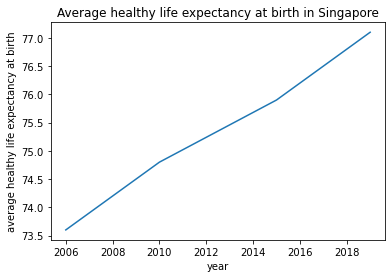

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv('WHR2021.csv')

anti_corr = df.groupby('Country name', as_index=False)['Perceptions of corruption', 'Healthy life expectancy at birth'].agg('mean').sort_values('Perceptions of corruption').head(10)
healthy_count = anti_corr.sort_values('Healthy life expectancy at birth', ascending=False)['Country name'].head(1)
count_plot = pd.read_csv(f'{healthy_count.to_string(index=False)}.csv')
count_plot.groupby('year')['Healthy life expectancy at birth'].agg('mean').plot()
plt.title(f'Average healthy life expectancy at birth in {healthy_count.to_string(index=False)}')
plt.xlabel('year')
plt.ylabel('average healthy life expectancy at birth')
plt.show()